# Projeto Aplicado

Análise Exploratoria de Dados

## Objetivo

Identificar insights sobre as condições habítais no estados de São Paulo (Brasil)

## Baixando bibliotecas

In [1]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Importando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.utils import check_folder, correct_zeros

## Checando existencia das pastas

In [3]:
check_folder('data')
check_folder('data/raw')
check_folder('data/processed')

## Carregando Dataset

In [4]:
df = pd.read_csv('./data/raw/housing_conditions_sao_paulo.csv', encoding='latin1', sep=';')

df

,cd_setor,cd_dist,nm_dist,area_km2,cd_mun,nm_mun,v0001,v0002,v0003,v0004,v0005,v0006,v0007,lat,long
0,350010505000001P,350010505,Adamantina,"0,123823",3500105,Adamantina,288,199,199,0,"2,086956522","16,66666667",138,"-21,688438","-51,074292"
1,350010505000002P,350010505,Adamantina,"0,202614",3500105,Adamantina,674,339,339,0,"2,407142857","1,428571429",280,"-21,685514","-51,076817"
2,350010505000003P,350010505,Adamantina,"0,235051",3500105,Adamantina,380,269,268,1,"1,914141414","4,04040404",198,"-21,685055","-51,072516"
3,350010505000004P,350010505,Adamantina,"0,288466",3500105,Adamantina,570,290,288,2,"2,398305085","1,271186441",236,"-21,690612","-51,069465"
4,350010505000005P,350010505,Adamantina,"0,213725",3500105,Adamantina,612,313,312,1,"2,220588235","4,044117647",272,"-21,692962","-51,072040"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102413,355730305000032P,355730305,Estiva Gerbi,"0,123545",3557303,Estiva Gerbi,715,248,248,0,"3,029661017",0,236,"-22,267680","-46,947312"
102414,355730305000033P,355730305,Estiva Gerbi,"0,149444",3557303,Estiva Gerbi,715,244,244,0,"3,235294118","4,07239819",221,"-22,272328","-46,943025"
102415,355730305000034P,355730305,Estiva Gerbi,"0,080984",3557303,Estiva Gerbi,405,133,133,0,"3,188976378","5,511811024",127,"-22,274732","-46,941732"
102416,355730305000035P,355730305,Estiva Gerbi,"0,145167",3557303,Estiva Gerbi,525,193,193,0,"2,932960894","3,351955307",179,"-22,275331","-46,956579"


## Mudando nome das colunas

In [5]:
df.rename(columns={
    'cd_setor': 'sector_id',
    'cd_dist': 'district_id',
    'nm_dist': 'district_name',
    'area_km2': 'sector_area_km2',
    'cd_mun': 'municipality_id',
    'nm_mun': 'municipality_name',
    'v0001': 'total_sector_population',
    'v0002': 'private_households_population',
    'v0003': 'permanent_households_population',
    'v0004': 'improvised_households_population',
    'v0005': 'population_density_km2',
    'v0006': 'household_trash_collection_percentage',
    'v0007': 'total_sector_households',
    'lat': 'sector_latitude',
    'long': 'sector_longitude'
}, inplace=True)

check_folder('data/processed')
df.to_csv('./data/processed/housing_conditions_sao_paulo_columns_names_changed.csv', index=False)

df

,sector_id,district_id,district_name,sector_area_km2,municipality_id,municipality_name,total_sector_population,private_households_population,permanent_households_population,improvised_households_population,population_density_km2,household_trash_collection_percentage,total_sector_households,sector_latitude,sector_longitude
0,350010505000001P,350010505,Adamantina,"0,123823",3500105,Adamantina,288,199,199,0,"2,086956522","16,66666667",138,"-21,688438","-51,074292"
1,350010505000002P,350010505,Adamantina,"0,202614",3500105,Adamantina,674,339,339,0,"2,407142857","1,428571429",280,"-21,685514","-51,076817"
2,350010505000003P,350010505,Adamantina,"0,235051",3500105,Adamantina,380,269,268,1,"1,914141414","4,04040404",198,"-21,685055","-51,072516"
3,350010505000004P,350010505,Adamantina,"0,288466",3500105,Adamantina,570,290,288,2,"2,398305085","1,271186441",236,"-21,690612","-51,069465"
4,350010505000005P,350010505,Adamantina,"0,213725",3500105,Adamantina,612,313,312,1,"2,220588235","4,044117647",272,"-21,692962","-51,072040"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102413,355730305000032P,355730305,Estiva Gerbi,"0,123545",3557303,Estiva Gerbi,715,248,248,0,"3,029661017",0,236,"-22,267680","-46,947312"
102414,355730305000033P,355730305,Estiva Gerbi,"0,149444",3557303,Estiva Gerbi,715,244,244,0,"3,235294118","4,07239819",221,"-22,272328","-46,943025"
102415,355730305000034P,355730305,Estiva Gerbi,"0,080984",3557303,Estiva Gerbi,405,133,133,0,"3,188976378","5,511811024",127,"-22,274732","-46,941732"
102416,355730305000035P,355730305,Estiva Gerbi,"0,145167",3557303,Estiva Gerbi,525,193,193,0,"2,932960894","3,351955307",179,"-22,275331","-46,956579"


## Informações do dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102418 entries, 0 to 102417
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   sector_id                              102418 non-null  object
 1   district_id                            102418 non-null  int64 
 2   district_name                          102418 non-null  object
 3   sector_area_km2                        102418 non-null  object
 4   municipality_id                        102418 non-null  int64 
 5   municipality_name                      102418 non-null  object
 6   total_sector_population                102418 non-null  int64 
 7   private_households_population          102418 non-null  int64 
 8   permanent_households_population        102418 non-null  int64 
 9   improvised_households_population       102418 non-null  int64 
 10  population_density_km2                 102418 non-null  object
 11  

## Tratamento de dados

In [7]:
df = df.dropna()
df = df.drop_duplicates()

df['population_density_km2'] = pd.to_numeric(df['population_density_km2'], errors='coerce').dropna()
df['municipality_id'] = pd.to_numeric(df['municipality_id'], errors='coerce')
df['district_name'] = df['district_name'].astype(str)
df['municipality_name'] = df['municipality_name'].astype(str)

check_folder('data/processed')
df.to_csv('./data/processed/housing_conditions_sao_paulo_cleaned.csv', index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102418 entries, 0 to 102417
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   sector_id                              102418 non-null  object 
 1   district_id                            102418 non-null  int64  
 2   district_name                          102418 non-null  object 
 3   sector_area_km2                        102418 non-null  object 
 4   municipality_id                        102418 non-null  int64  
 5   municipality_name                      102418 non-null  object 
 6   total_sector_population                102418 non-null  int64  
 7   private_households_population          102418 non-null  int64  
 8   permanent_households_population        102418 non-null  int64  
 9   improvised_households_population       102418 non-null  int64  
 10  population_density_km2                 5594 non-null    

## Criando coluna com a porcentagem de familia privada na população

In [8]:
df['percentage_private_households'] = ((df['private_households_population'] / df['total_sector_population']) * 100).round(1)
df['permanent_households_population'] = df['permanent_households_population'].apply(correct_zeros)
df['permanent_households_population'] = df['permanent_households_population'].fillna(0)

df.to_csv('./data/processed/housing_conditions_sao_paulo_percentage_private_households_added.csv', index=False)

df

,sector_id,district_id,district_name,sector_area_km2,municipality_id,municipality_name,total_sector_population,private_households_population,permanent_households_population,improvised_households_population,population_density_km2,household_trash_collection_percentage,total_sector_households,sector_latitude,sector_longitude,percentage_private_households
0,350010505000001P,350010505,Adamantina,"0,123823",3500105,Adamantina,288,199,199,0,NaN,"16,66666667",138,"-21,688438","-51,074292",69.1
1,350010505000002P,350010505,Adamantina,"0,202614",3500105,Adamantina,674,339,339,0,NaN,"1,428571429",280,"-21,685514","-51,076817",50.3
2,350010505000003P,350010505,Adamantina,"0,235051",3500105,Adamantina,380,269,268,1,NaN,"4,04040404",198,"-21,685055","-51,072516",70.8
3,350010505000004P,350010505,Adamantina,"0,288466",3500105,Adamantina,570,290,288,2,NaN,"1,271186441",236,"-21,690612","-51,069465",50.9
4,350010505000005P,350010505,Adamantina,"0,213725",3500105,Adamantina,612,313,312,1,NaN,"4,044117647",272,"-21,692962","-51,072040",51.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102413,355730305000032P,355730305,Estiva Gerbi,"0,123545",3557303,Estiva Gerbi,715,248,248,0,NaN,0,236,"-22,267680","-46,947312",34.7
102414,355730305000033P,355730305,Estiva Gerbi,"0,149444",3557303,Estiva Gerbi,715,244,244,0,NaN,"4,07239819",221,"-22,272328","-46,943025",34.1
102415,355730305000034P,355730305,Estiva Gerbi,"0,080984",3557303,Estiva Gerbi,405,133,133,0,NaN,"5,511811024",127,"-22,274732","-46,941732",32.8
102416,355730305000035P,355730305,Estiva Gerbi,"0,145167",3557303,Estiva Gerbi,525,193,193,0,NaN,"3,351955307",179,"-22,275331","-46,956579",36.8


## Media e Mediana da população e familia por setor


In [9]:
mean_sector_population = df['total_sector_population'].mean()
median_sector_population = df['total_sector_population'].median()

mean_sector_households = df['total_sector_households'].mean()
median_sector_households = df['total_sector_households'].median()

print(f'Média de familia total por setor: {mean_sector_households:.2f}')
print(f'Mediana de familia total por setor: {median_sector_households:.2f}')

print(f'Média da população total por setor: {mean_sector_population:.2f}')
print(f'Mediana da população total por setor: {median_sector_population:.2f}')

Média de familia total por setor: 158.58
Mediana de familia total por setor: 159.00
Média da população total por setor: 433.63
Mediana da população total por setor: 424.00


## Gerando gráficos

### Distribuição da População total por setor


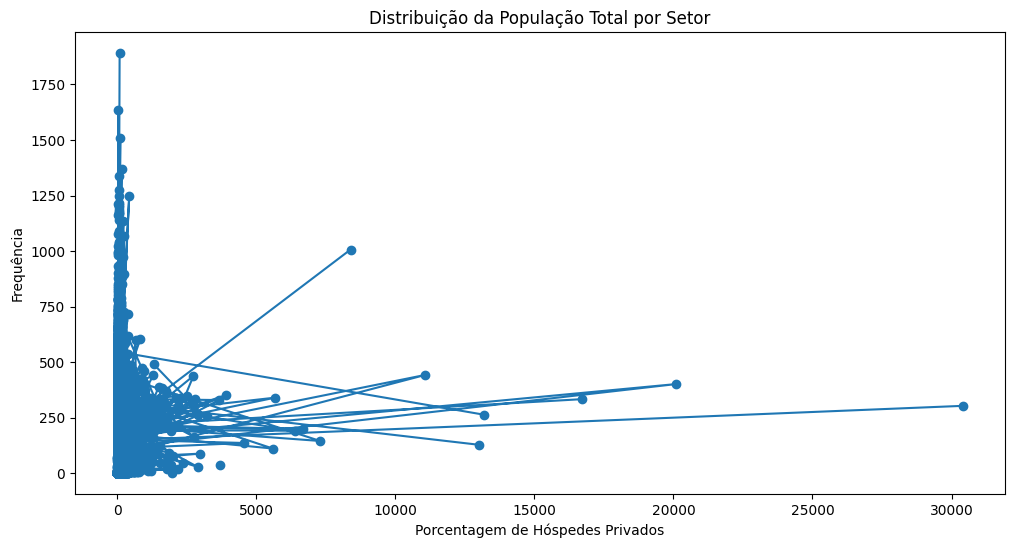

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['percentage_private_households'], df['permanent_households_population'], marker='o')
plt.xlabel('Porcentagem de Hóspedes Privados')
plt.ylabel('Frequência')
plt.title('Distribuição da População Total por Setor')
plt.show()

### Relação entre Dominicios e População Total por Setor

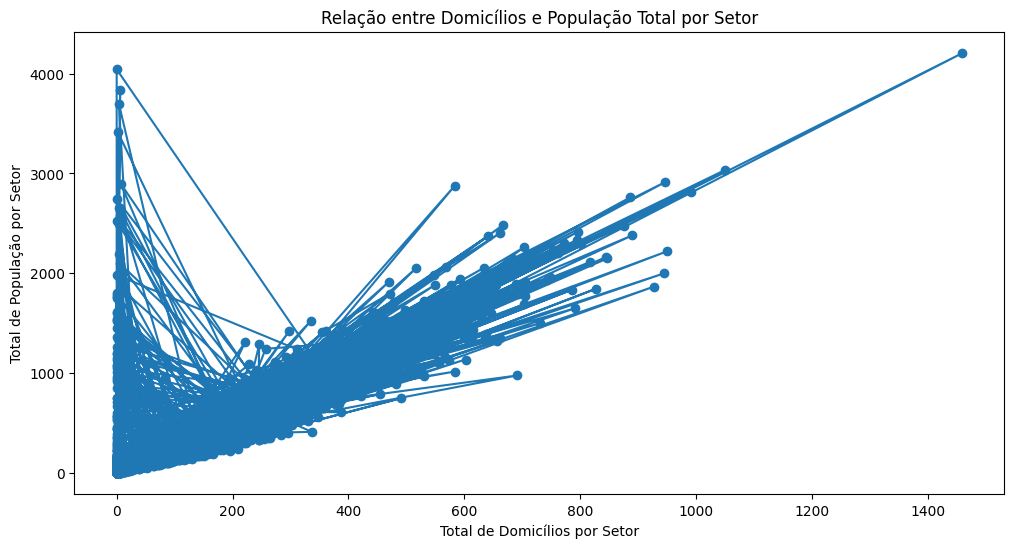

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['total_sector_households'], df['total_sector_population'], marker='o')
plt.xlabel('Total de Domicílios por Setor')
plt.ylabel('Total de População por Setor')
plt.title('Relação entre Domicílios e População Total por Setor')
plt.show()

### Top 10 Municípios com Maior Densidade Populacional

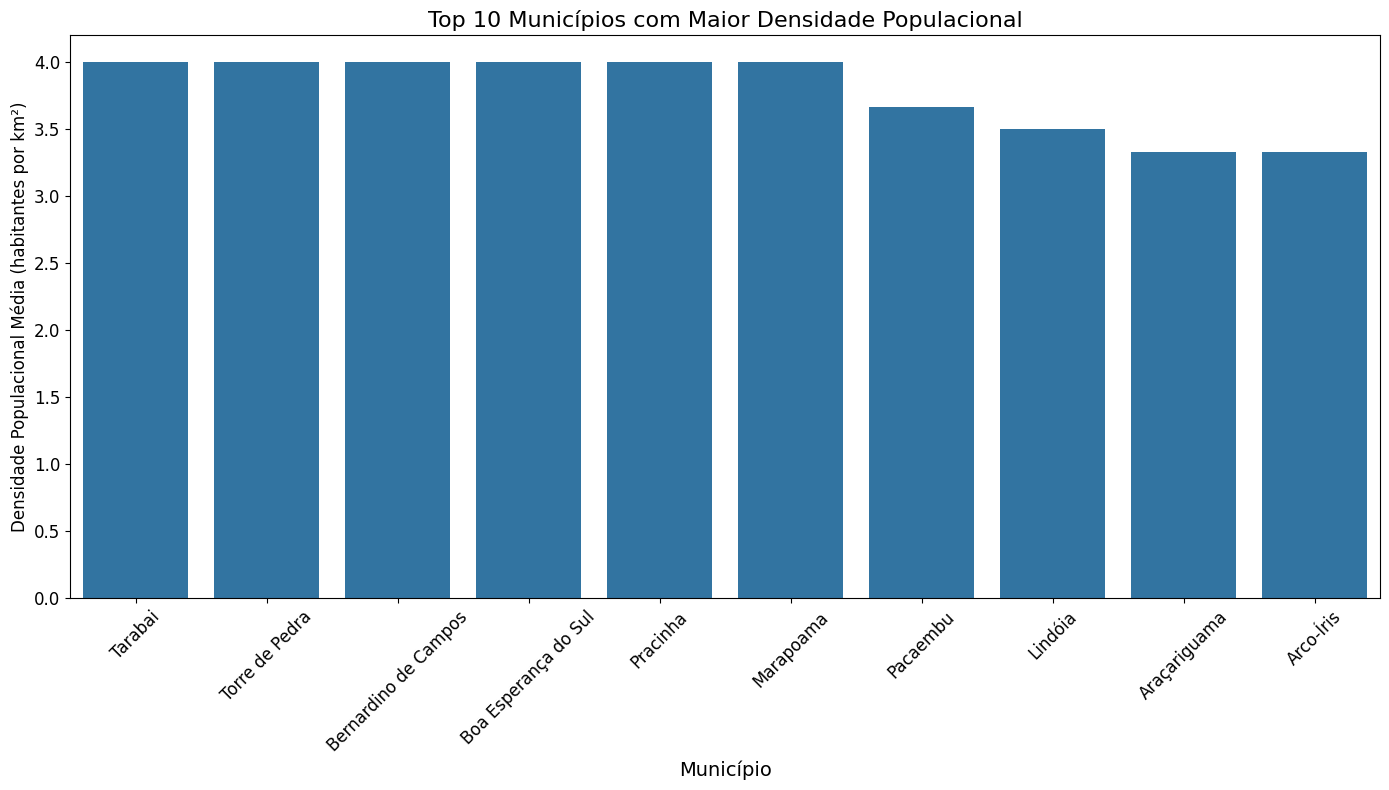

In [12]:
df_municipality = df.groupby('municipality_name')['population_density_km2'].mean().reset_index()
df_municipality = df_municipality.sort_values(by='population_density_km2', ascending=False)

top_10_municipality = df_municipality.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='municipality_name', y='population_density_km2', data=top_10_municipality)
plt.title('Top 10 Municípios com Maior Densidade Populacional', fontsize=16)
plt.xlabel('Município', fontsize=14)
plt.ylabel('Densidade Populacional Média (habitantes por km²)', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Distribuição da densidade populacional por km2

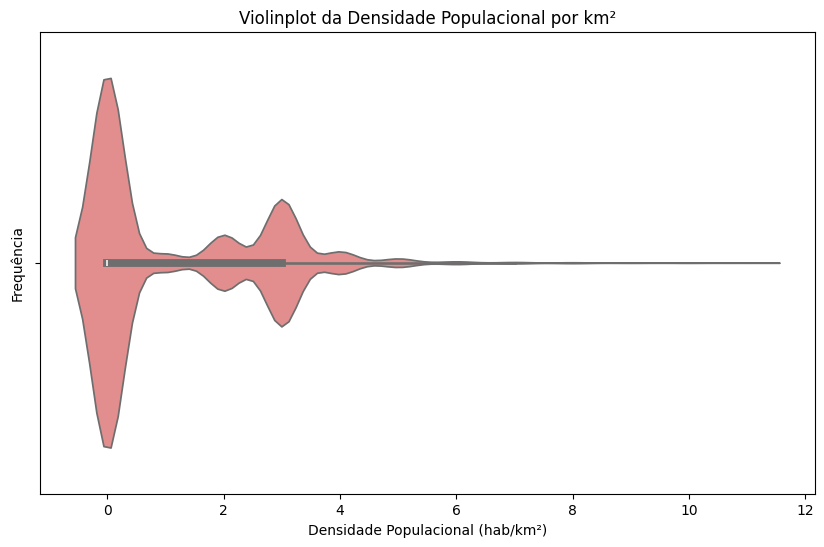

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['population_density_km2'], color='lightcoral')
plt.title('Violinplot da Densidade Populacional por km²')
plt.xlabel('Densidade Populacional (hab/km²)')
plt.ylabel('Frequência')
plt.show()

### Distribuição da Densidade Populacional por Faixas de Domicílios no Setor

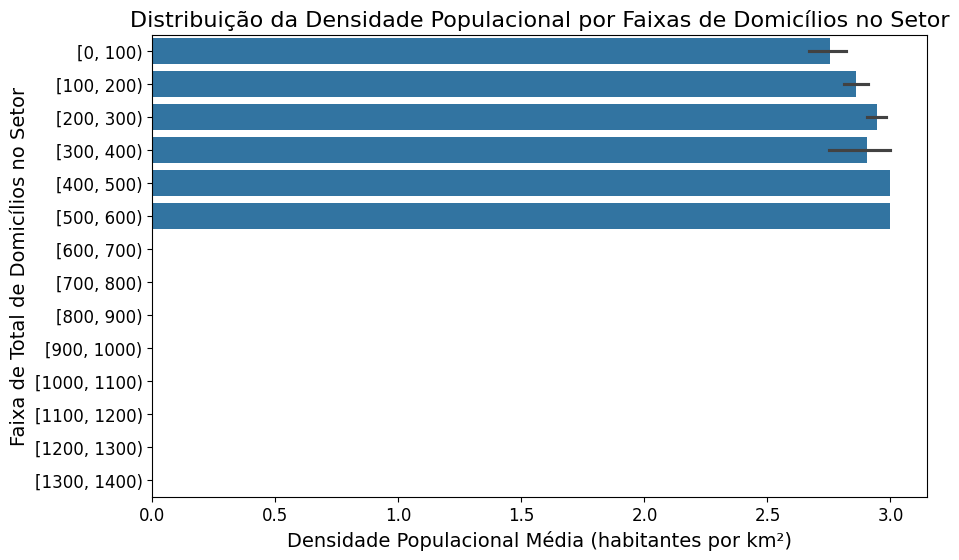

In [14]:
df_grouped = df.groupby('total_sector_households')['population_density_km2'].mean().reset_index().drop_duplicates()
df_grouped['household_range'] = pd.cut(df_grouped['total_sector_households'], bins=range(0, df_grouped['total_sector_households'].max(), 100), right=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='population_density_km2', y='household_range', data=df_grouped)
plt.title('Distribuição da Densidade Populacional por Faixas de Domicílios no Setor', fontsize=16)
plt.xlabel('Densidade Populacional Média (habitantes por km²)', fontsize=14)
plt.ylabel('Faixa de Total de Domicílios no Setor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Análise Exploratória de Dados - Condições Habitacionais em São Paulo (Relatório)

## Principais Insights

1.  **Distribuição da População e Famílias:**
    * Disparidades significativas na distribuição da população total e densidade populacional entre as regiões.
    * Correlação entre a porcentagem de domicílios privados e a população permanente em domicílios permanentes, necessitando investigação mais profunda.
    * Variação entre a média e mediana da população e número de domicílios por setor, indicando possíveis outliers.

2.  **Densidade Populacional:**
    * Identificação da faixa de densidade populacional mais comum e presença de outliers através de histogramas.
    * Necessidade de infraestrutura e serviços públicos em setores com alta densidade.
    * Desafios específicos em setores com baixa densidade.

3.  **Coleta de Lixo e Domicílios Privados:**
    * Importância da coleta de lixo e porcentagem de domicílios privados na avaliação da qualidade de vida e condições sanitárias.

4.  **Dados por Município:**
    * Identificação de padrões regionais através da agregação de dados por município.
    * Compreensão dos maiores desafios regionais ao analisar população total, número de domicílios, densidade populacional, coleta de lixo e domicílios privados.